## Shell Contact Example

In [1]:
# !pip install debugpy

In [2]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.005)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e6,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=True,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-3,
                                  max_iter=100,
                                  total_time=5,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
# env.add_force('selfContact', delta=0.01*2*5e-3, h=5e-3)
env.add_force('selfContact', delta=1e-4, h=5e-3, kc=1)
#env.set_static()  

geo = dismech.Geometry.from_txt('input hemisphere less dense.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

fixed_point = np.array(np.where(
    robot.state.q[robot.node_dof_indices].reshape(-1, 3)[:, 2] >= 0.99)[0])
robot = robot.fix_nodes(fixed_point)

print(fixed_point)
# u = robot.state.u
# u[11] = -0.5
# u[14] = -0.5
# u[17] = -0.5

[15]


In [3]:
print("# nodes: ", np.shape(robot.nodes))
print("# faces: ", np.shape(robot.face_nodes_shell))

# nodes:  (19, 3)
# faces:  (24, 3)


### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [4]:
stepper = dismech.ImplicitEulerTimeStepper(robot)



delta: 0.02
h: 1.0
K1: 750.0
scale:  200.0
kc:  1
upper limit for quadratic: 1.98
upper limit for smooth: 2.02


In [5]:
robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

76.039174799588
current_time:  0.001
152.0518307422209
7.746837280250493e-06
current_time:  0.002
228.02551233364485
1.741135678088645e-05
current_time:  0.003
303.94855857630324
3.09119364524488e-05
current_time:  0.004
379.81026181846863
4.82233315894024e-05
current_time:  0.005
455.6010054573628
6.931597343160894e-05
current_time:  0.006
531.3123709181673
9.415669785507747e-05
current_time:  0.007
606.9372132721119
0.0001227088889458312
current_time:  0.008
682.4697045991869
0.00015493449782846337
current_time:  0.009000000000000001
757.9053450695127
0.0001907938959332765
current_time:  0.01
833.240942544874
0.00023024750937032
current_time:  0.011
908.4745622405434
0.0002732562291068071
current_time:  0.012
983.6054486492391
0.0003197824092376941
current_time:  0.013000000000000001
1058.6339224669136
0.00036979028786197525
current_time:  0.014
1133.5612556892588
0.00042324804381749367
current_time:  0.015
1208.3895283520067
0.00048012595388243065
current_time:  0.016
1283.121470579

In [6]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2p', plot_step=10)

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

501


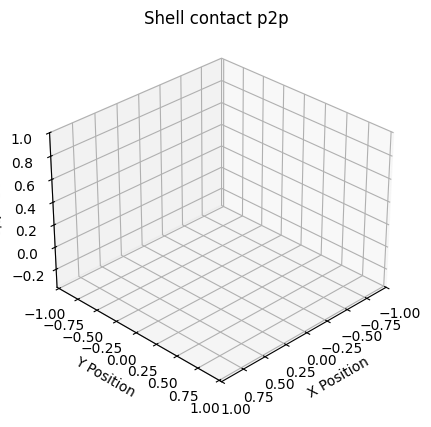

In [7]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('shell_hemisphere_self_contact.gif')